In [2]:
import matplotlib
import matplotlib.pyplot as plt
from dist_rsa.heuristics import *
import numpy



In [27]:
def failable_metrics(sent,verb_lemma,vecs):

	# sent = sent_to_dict(sent,verb_lemma)
	try:
		sent = sent_to_dict(sent,verb_lemma)
# 		print(sent)
	except: 
# 		print(sent)
# 		print("FAILURE")
		return None,None

	# print("begin sent",sent,"end sent")
	# print(sent.keys())
	projection_words = sorted(list(set([w for w in sent["sent"] if (w in vecs) and (w not in sent["dobj"]+sent["nsubj"]+[sent["verb"]] )])))
	if projection_words == []: return None
# 	print("projection words",projection_words)
	projection_matrix = np.asarray([vecs[w] for w in projection_words]).T

	# projection_matrix = np.asarray([vecs["big"],vecs["small"]]).T

# 	print(projection_matrix)
# 	print("proj mat shape",projection_matrix.shape)
	# print(np.linalg.det(projection_matrix))
	# raise Exception
	s_o = np.mean([vecs[v] for v in sent["dobj"]+sent["nsubj"] if v in vecs],axis=0)
	# print("O",o)
	v = vecs[sent["verb"]]
	# print(o)
	# print(v)
	# s_o = np.mean([s,o],axis=0)

	distance_in_original_space = scipy.spatial.distance.euclidean(v,s_o)


	try:projected_s_o = np.squeeze(projection(np.expand_dims(s_o,1), projection_matrix))
	except: 
# 		print(projection_words,sent["nsubj"],sent["dobj"],sent["verb"])
		raise Exception
	projected_v = np.squeeze(projection(np.expand_dims(v,1), projection_matrix))

# 	print("shapes",projected_s_o.shape)
# 	print("shapes",projected_v.shape)

# 	print("shapes",s_o.shape)
# 	print("shapes",v.shape)

	distance_in_subspace = scipy.spatial.distance.euclidean(projected_s_o,projected_v)

	return distance_in_original_space, scipy.spatial.distance.cosine(np.mean([s_o,v],axis=0),np.mean([projected_s_o,projected_v],axis=0))
# 	return distance_in_original_space,distance_in_subspace

def metrics(sent,verb_lemma,vecs):
# 	return failable_metrics(sent,verb_lemma)
	try: out = failable_metrics(sent=sent,verb_lemma=verb_lemma,vecs=vecs)
	except: out = (None,None)
	return out

In [28]:
# old_vecs = vecs
vecs = load_vecs(mean=True,pca=False,vec_length=300,vec_type='glove.6B.')

# new_vecs = {}
# for vec in vecs:
#     new_vecs[vec]=vecs[vec]/np.linalg.norm(vecs[vec])
# vecs = new_vecs




loading vecs (load vecs): glove.6B.mean_vecs300


In [29]:
import random

data = load_trofi_data()

print(list(data.keys()))

['flourish', 'evaporate', 'step', 'miss', 'absorb', 'flood', 'vaporize', 'smooth', 'drink', 'ride', 'pass', 'roll', 'kill', 'rest', 'plant', 'flow', 'die', 'dance', 'lend', 'pour', 'fly', 'pump', 'sleep', 'strike', 'wither', 'play', 'melt', 'fix', 'cool', 'fill', 'grab', 'target', 'stumble', 'touch', 'drown', 'destroy', 'examine', 'dissolve', 'grasp', 'escape', 'knock', 'stick', 'drag', 'kick', 'eat', 'besiege', 'rain', 'assault', 'plow', 'attack']


In [30]:

lit_data = []
met_data = []

for verb in sorted(list(data))[:]:
#     ["absorb","attack","destroy","drink","melt","vaporize"])[:]:

#     lit_data = [metrics(s,"absorb") for s in data["absorb"]["literal"]]
    print("\n\n\n\n\n"+verb+"\n\n\n")
    lit_data += [(s,metrics(sent=s,verb_lemma=verb,vecs=vecs)) for s in data[verb]["literal"] ]

#     met_data = [metrics(s,"absorb") for s in data["absorb"]["non_literal"]  ]
    met_data += [(s,metrics(sent=s,verb_lemma=verb,vecs=vecs)) for s in data[verb]["non_literal"]  ]


# data = [X,y]
# lit_data






absorb








assault








attack








besiege








cool








dance








destroy








die





/home/rcohngordon/dist-rsa/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/rcohngordon/dist-rsa/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)







dissolve








drag








drink








drown








eat








escape








evaporate








examine








fill








fix








flood








flourish








flow








fly








grab








grasp








kick








kill








knock








lend








melt








miss








pass








plant








play








plow








pour








pump








rain








rest








ride








roll








sleep








smooth








step








stick








strike








stumble








target








touch








vaporize








wither





In [31]:
new_lit_data = [[triple[0],triple[1][0],triple[1][1]] for triple in lit_data if triple[1] is not None and triple[1][0] is not None and triple[1][1] is not None]
new_met_data = [[triple[0],triple[1][0],triple[1][1]] for triple in met_data if triple[1] is not None and triple[1][0] is not None and triple[1][1] is not None]

# met_data = [pair for pair in met_data if pair is not None and pair[0] is not None and pair[1] is not None]

Xy = [[triple[0],triple[1],triple[2],0] for triple in new_lit_data]+[[triple[0],triple[1],triple[2],1] for triple in new_met_data]
random.seed(4)
random.shuffle(Xy)
X = np.asarray([[x[1],x[2]] for x in Xy])
y = np.asarray([[x[3]] for x in Xy])

In [32]:
sents = [item[0] for item in Xy]

In [47]:
import math


len_data = len(X)
# print(len_data)
tenth_of_data = len_data // 10
train_split = tenth_of_data
val_split = 5 * tenth_of_data
test_split = len_data

train_X = X[:train_split]
train_y = y[:train_split]
val_X = X[train_split:val_split]
val_y = y[train_split:val_split]
test_X = X[val_split:test_split]
test_y = y[val_split:test_split]

# len()
val_y.shape

(688, 1)

In [48]:
# graph subsampled data
# unzipped_lit_train_val_data = list(zip(*[x for (i,x) in enumerate(np.concatenate([train_X,val_X],axis=0)) if (np.concatenate([train_y,val_y],axis=0))[i]==0]))

# list(zip(*lit_data[:]))
# unzipped_met_train_val_data = list(zip(*[x for (i,x) in enumerate(np.concatenate([train_X,val_X],axis=0)) if (np.concatenate([train_y,val_y],axis=0))[i]==1]))
# unzipped_lit_data[1]

# unzipped_lit_train_val_data = list(zip(*[x for (i,x) in enumerate(train_X) if (train_y)[i]==0]))
# unzipped_met_train_val_data = list(zip(*[x for (i,x) in enumerate(train_X) if (train_y)[i]==1]))

unzipped_lit_train_val_data = list(zip(*[x for (i,x) in enumerate(val_X) if (val_y)[i]==0]))
unzipped_met_train_val_data = list(zip(*[x for (i,x) in enumerate(val_X) if (val_y)[i]==1]))


In [49]:
index = 32
print(val_X[index])
print(val_y[index])
print(sents[index])

[6.45564513 0.12826201]
[1]
Every Oct. 21st since , officers of the Royal Navy gather in formal dress wherever they may be , and drink a toast to `` The Immortal Memory . ''/''


In [50]:
index = 4
print(val_X[index])
print(val_y[index])
print(sents[index])

[5.92620114 0.10872013]
[0]
It was then that a 747 crash killed 520 people , the worst single-aircraft accident in aviation history ./.


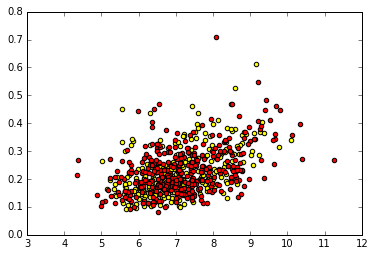

In [51]:


prior_hm = matplotlib.pyplot.scatter(c='yellow',x=unzipped_lit_train_val_data[0],y=unzipped_lit_train_val_data[1])
_ = matplotlib.pyplot.scatter(c='red',x=unzipped_met_train_val_data[0],y=unzipped_met_train_val_data[1])

In [35]:
from sklearn.linear_model import Perceptron,LogisticRegression
clf = LogisticRegression(tol=1e-3, random_state=0)

# X = np.expand_dims(np.asarray(unzipped_train_data[0]),1)
# y = np.asarray(unzipped_train_data[1])

# print(X.shape)
# print(X)
# print(y)
clf.fit(train_X, train_y)
# pred = clf.predict([val_X[1]])
# truth = val_y[1]
# print(pred,truth)
clf.score(val_X,val_y)
# clf.score(train_X,train_y)

/home/rcohngordon/dist-rsa/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5247093023255814

In [25]:
0.5218023255813954

0.5218023255813954

In [112]:
0.6104651162790697

0.6104651162790697

In [12]:
0.622093023255814

0.622093023255814